# Answering the Science Question

This notebook is the culmination of CS185C's project where we would answer the science question on the Philippines: **How does the rising global temperatures affect the rate of typhoons happening on the Philipppines' Coast?**

First, import packages to re-create and visualize the model fields here:

In [512]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [513]:
# define the input directory
project_dir = '/Users/johnathonlu/Documents/SJSU/cs185c_spring2025/Project'

Then, re-create the model grid

In [514]:
# define the parameters that will be used in the data file
delX = 1/12
delY = 1/12
xgOrigin = 110
ygOrigin = 3
n_rows = 204
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results 1998 and 2011. I'll choose one field near the end of my simulation:

In [515]:

grid_1998 = np.fromfile(os.path.join(project_dir,'run_1998','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000090720.data'), '>f4')
grid_1998 = grid_1998.reshape((2,n_rows,n_cols))


grid_2011 = np.fromfile(os.path.join(project_dir,'run_2011','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000090720.data'), '>f4')
grid_2011 = grid_2011.reshape((2,n_rows,n_cols))

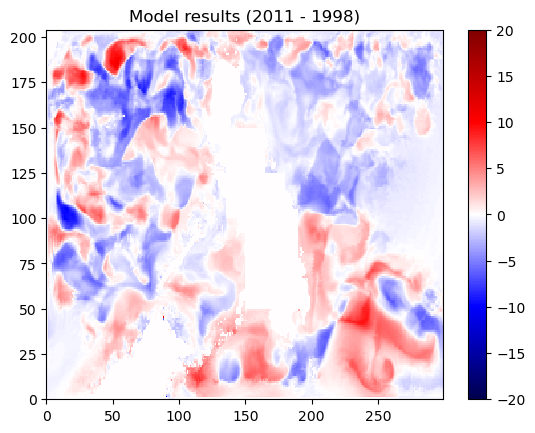

In [516]:
# plot the differences
C = plt.pcolormesh(grid_2011[0,:,:-1]-grid_1998[0,:,:-1],
                   cmap='seismic',vmin=-20, vmax=20)
plt.colorbar(C)
plt.title('Model results (2011 - 1998)')
plt.show()

Looking at the model, you could see that there's a mixture of temperautres ranging -20 to 20 degrees between the dozen years in between. You will notice however that at much of the model is peppered with warmer temperatures throughout the plot.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [517]:
row = 80
col = 200

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [518]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(1998,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [519]:
timestep_dates = []
theta_1998_values = []
theta_2011_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_2011','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_1998 = np.fromfile(os.path.join(project_dir,'run_1998','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_1998 = grid_1998.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_2011 = np.fromfile(os.path.join(project_dir,'run_2011','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_2011 = grid_2011.reshape((2,n_rows,n_cols))

        theta_1998_values.append(grid_1998[0,row,col])
        theta_2011_values.append(grid_2011[0,row,col])

Finally, I'll plot the timeseries to see the comparison:

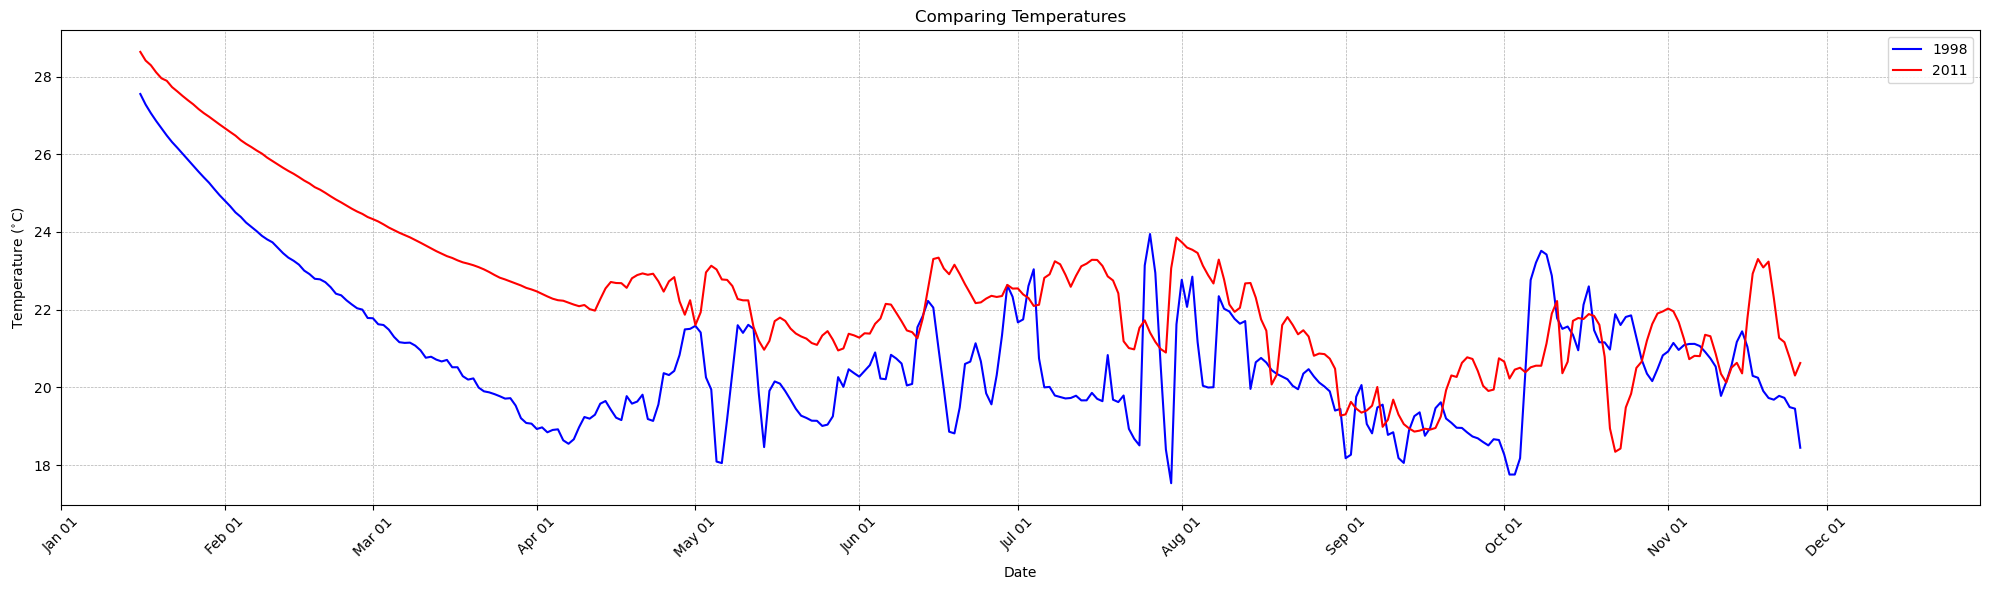

In [520]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 6))

# Plot your data
ax.plot(timestep_dates, theta_1998_values, 'b-', label='1998')
ax.plot(timestep_dates, theta_2011_values, 'r-', label='2011')

start_date = datetime(1998, 1, 1)
end_date = datetime(1998, 12, 30)
ax.set_xlim(start_date, end_date)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., Jan 15
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^{\circ}$C)')
ax.set_title('Comparing Temperatures')
ax.legend()
ax.grid(linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [521]:
timestep_dates = []
theta_1998_values = []
theta_2011_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_2011','diags','EtaN_day_snap'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_1998 = np.fromfile(os.path.join(project_dir,'run_1998','diags',
                                             'EtaN_day_snap',
                                             file_name), '>f4')
        grid_1998 = grid_1998.reshape((1,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_2011 = np.fromfile(os.path.join(project_dir,'run_2011','diags',
                                             'EtaN_day_snap',
                                             file_name), '>f4')
        grid_2011 = grid_2011.reshape((1,n_rows,n_cols))

        theta_1998_values.append(grid_1998[0,row,col])
        theta_2011_values.append(grid_2011[0,row,col])

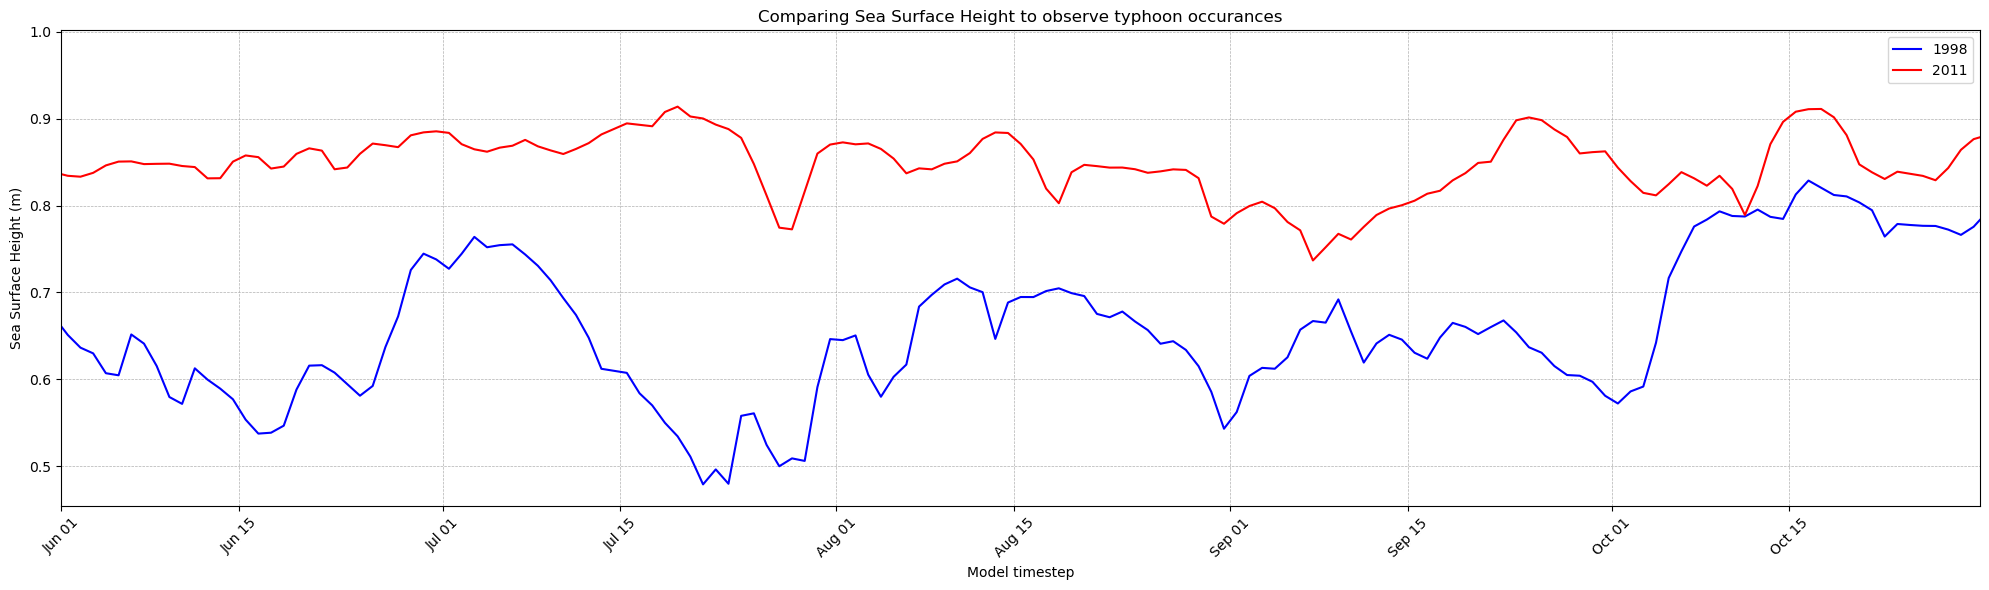

In [522]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot your data
ax.plot(timestep_dates, theta_1998_values, 'b-', label='1998')
ax.plot(timestep_dates, theta_2011_values, 'r-', label='2011')

start_date = datetime(1998, 6, 1)
end_date = datetime(1998, 10, 30)
ax.set_xlim(start_date, end_date)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., Jan 15
ax.set_ylabel('Sea Surface Height (m)')
ax.set_xlabel('Model timestep')
ax.set_title('Comparing Sea Surface Height to observe typhoon occurances')
ax.legend()
ax.grid(linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above I plotted where the typhoon frequency happens most frequently. Looking at the graphs above, you could see that on average, not only are the temperatures higher, but also the Sea Surface Height during this period. With the knowledge that typhoons cause a dip in the Sea Surface height when they arrive, you could determine when the typhoons hit this part of the Philippino Coast. 

From the Sea Surface Height Graph, in 1998, you can see 13 dips along the line, two between Jun 1 and Jun 15, two during Jun 15 and Jul 1, one large one between Jul 1 and Jul 15, two during Jul 15 and Aug 1, two between Aug 1 and Aug 15, one around Sept 1, two around Sept 15, and one during Oct 1. 
While this doesn't match the number of typhoons from this [Wikipedia Source](https://en.wikipedia.org/wiki/List_of_Philippine_typhoons_(1963%E2%80%931999)) which states that the Philippines received 9 typhoons during that year, two during August, one in September, and two in October.
This is similar with my 2011 plot as you can see 13 major dips along the line, while there were only 10 typhoons that happened during that season according to this [Wikipedia Source](https://en.wikipedia.org/wiki/List_of_Philippine_typhoons_(2000%E2%80%93present)).

While the Sea Surface Height being higher on average when comparing 2011 and 1998 and temperatures on average being higher on average, it's difficult to determine whether my data is good or not due to the fact that there is a large relatively straight line that goes from January to April which shouldn't be how the temperature in the Philippines should react as the temperature stays relatively constant throughout the year. According to [this source](https://weatherspark.com/h/m/134588/1998/5/Historical-Weather-in-May-1998-in-Manila-Philippines#Figures-Temperature) of Manila temperatures in 1998, temperatures go to $100^\circ$ Farenheit or $38^\circ$ Celsius and only goes down to $70^\circ$ Farenheit or $27^\circ$ Celsius. This fact could have potentially skewed my results as how the data was being processed and outputted could have been inherently flawed.

If I were to redo this project all over again, I would like to run my model over more years than just 1998 and 2011. I chose these dates due to doing research on El Nino and La Nina extremities and these two years were the most different from each other while both being La Nina. By observing more than just these two years would allow me to look at the trend holistically. I would also like to get wind and current data as well to ensure that the points I observed were in fact typhoons instead of other possible factors and observe how taking off the wind could have affected how my model changes.